Контекст
Вы работаете в отделе безопасности крупного банка. Перед вами стоит критически важная задача: разработать систему обнаружения мошеннических операций по кредитным картам в реальном времени. Для этого вам предоставили анонимизированный датасет транзакций.

Датасет: [Credit Card Fraud Detection]( https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

Постановка задачи
Проведите сравнительный анализ алгоритмов машинного обучения для задачи бинарной классификации транзакций на:

Легальные (Class = 0)

Мошеннические (Class = 1)

Задача 1. Предобработка данных (1 балл)

- Изучите распределение целевой переменной (анализ дисбаланса классов). Постройте графики

- Проведите масштабирование признаков (V1-V28 уже нормализованы, но Time и Amount требуют обработки)

- Разделите данные на обучающую и тестовую выборки (учтите стратификацию из-за дисбаланса)

In [3]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv("/content/sample_data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


85


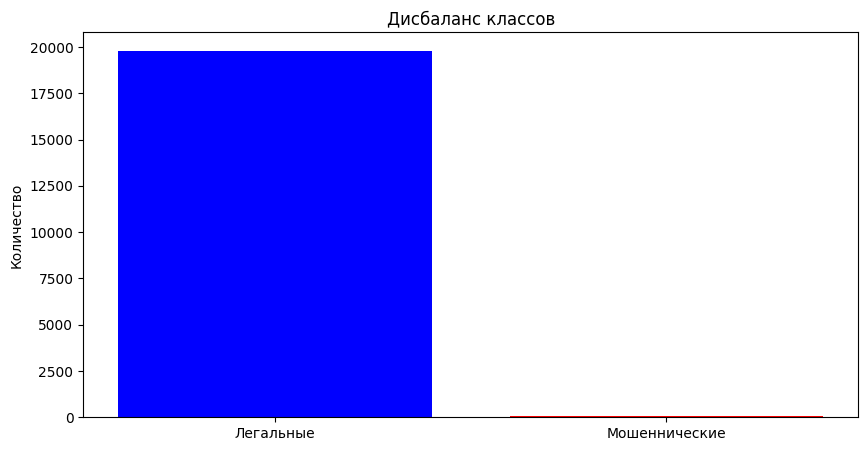

In [5]:
import matplotlib.pyplot as plt

class_counts = data['Class'].value_counts()
print(class_counts[1])
plt.figure(figsize=(10, 5))
bars = plt.bar(['Легальные', 'Мошеннические'], class_counts.values, color=['blue', 'red'])
plt.title('Дисбаланс классов')
plt.ylabel('Количество')
plt.show()

In [6]:
from math import nan
from sklearn.preprocessing import StandardScaler

data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Amount']])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.473812,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.386392,0.0
1,-1.473812,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.329088,0.0
2,-1.473716,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.501709,0.0
3,-1.473716,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.259200,0.0
4,-1.473621,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.001369,0.0


data[data['Class'].isna()] показал, что есть одна строка, где class=Nan, странная штука, решила просто удалить это.

In [7]:
from sklearn.model_selection import train_test_split
data = data.dropna(subset=['Class'])
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Задача 2. Построение   моделей ( 2 балла)

Реализуйте следующие алгоритмы:

Базовые модели:

- Линейная регрессия (с пороговой функцией)

- kNN (k-ближайших соседей)

- Решающее дерево

Ансамблевые методы:

- Бэггинг (BaggingClassifier)

- Случайный лес (Random Forest)

- Стекинг (StackingClassifier) для моделей

  *   LogisticRegression,
  *  KNeighborsClassifier,
  *  DecisionTreeClassifier


In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

stacking_base_models = [
  ("logreg", LogisticRegression(max_iter=1000)),
  ("knn", KNeighborsClassifier(n_neighbors=5)),
  ("tree", DecisionTreeClassifier(max_depth=5)),
]

models = [
  ("Linear Regression", LinearRegression()),
  ("kNN", KNeighborsClassifier(n_neighbors=5)),
  ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
  ("BaggingClassifier", BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10)),
  ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=5)),
  ("Stacking", StackingClassifier(estimators=stacking_base_models, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1))
]

metrics = []
for name, model in models:
  print(name)
  model.fit(X_train, y_train)

  if name == "Linear Regression":
    y_proba = model.predict(X_test)
    y_pred = (y_proba > 0.5).astype(int)
  else:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]


  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_proba)
  cm = confusion_matrix(y_test, y_pred)
  print("Precision:", prec)
  print("Recall:", recall)
  print("F1-score:", f1)
  print("ROC-AUC:", roc_auc)
  print("Confusion matrix:")
  print(cm)
  print()

  model_metrics = {
    'name': name,
    'precision': prec,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
    }

  metrics.append(model_metrics)



Linear Regression
Precision: 0.625
Recall: 0.5882352941176471
F1-score: 0.6060606060606061
ROC-AUC: 0.990841756838996
Confusion matrix:
[[3957    6]
 [   7   10]]

kNN
Precision: 0.9166666666666666
Recall: 0.6470588235294118
F1-score: 0.7586206896551724
ROC-AUC: 0.9703804307491354
Confusion matrix:
[[3962    1]
 [   6   11]]

Decision Tree
Precision: 0.9375
Recall: 0.8823529411764706
F1-score: 0.9090909090909091
ROC-AUC: 0.9672782057561858
Confusion matrix:
[[3962    1]
 [   2   15]]

BaggingClassifier
Precision: 0.9333333333333333
Recall: 0.8235294117647058
F1-score: 0.875
ROC-AUC: 0.9664321443944724
Confusion matrix:
[[3962    1]
 [   3   14]]

Random Forest
Precision: 0.9333333333333333
Recall: 0.8235294117647058
F1-score: 0.875
ROC-AUC: 0.9823885648127533
Confusion matrix:
[[3962    1]
 [   3   14]]

Stacking
Precision: 0.9333333333333333
Recall: 0.8235294117647058
F1-score: 0.875
ROC-AUC: 0.9931572931973698
Confusion matrix:
[[3962    1]
 [   3   14]]



Может долго работать, но примерно до 15-20 минут !

Задача 3. Оценка моделей ( 2 балла )

Для каждой модели рассчитайте:

- Precision и Recall

- F1-score (основная метрика из-за дисбаланса)

- ROC-AUC

- Матрицу ошибок (Confusion Matrix)

Подсказка: Мы оцениваем на тестовой выборке

In [14]:
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.set_index('name')
df_metrics

,precision,recall,f1,roc_auc
name,,,,
Linear Regression,0.625000,0.588235,0.606061,0.990842
kNN,0.916667,0.647059,0.758621,0.970380
Decision Tree,0.937500,0.882353,0.909091,0.967278
BaggingClassifier,0.933333,0.823529,0.875000,0.966432
Random Forest,0.933333,0.823529,0.875000,0.982389
Stacking,0.933333,0.823529,0.875000,0.993157


Выводы:

Задача 4. Сравнительный анализ ( 1 балл)

Создайте сводную таблицу со всеми метриками и проведите анализ:

- Какая модель показывает наилучшее качество?

- Какие модели лучше обнаруживают мошеннические транзакции (высокий recall)?

- Какие модели минимизируют ложные срабатывания (высокий precision)?

Ответы:  
Наилучшее качество показывает Decision Tree, а модели BaggingClassifier, Random Forest и Stacking справились почти одинаково, тоже хорошие результаты.  
Самый высокий recall у Decision Tree - 0.88, но все равно далеко от идеала, у остальных же моделей показатели значительно ниже, скорее всего вызвано очень маленьким процентом мошеннических транзакций.  
У всей четверки лидеров precision на одном уровне - достойные показатели ~0.93.

Задача 5. Углубленный анализ ошибок ( 2 балла)
- Проанализируйте ложно-положительные и ложно-отрицательные случаи лучшей модели

- Определите паттерны в транзакциях, которые модель классифицирует неправильно

- Визуализируйте распределение ошибок по признакам Amount и Time

Decision Tree
FP: 1 FN: 2


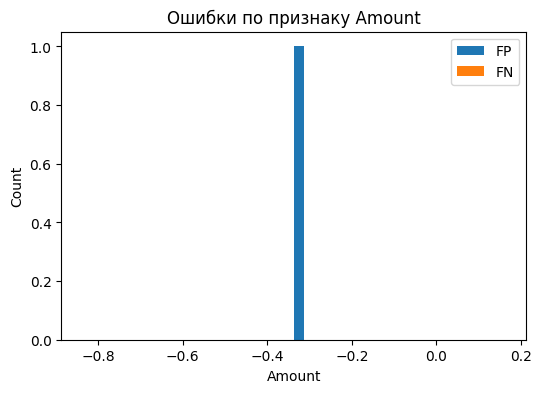

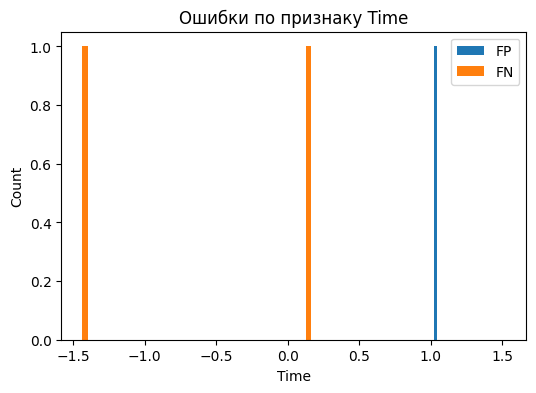

In [22]:
best_model = models[2]
print(best_model[0])

y_pred = best_model[1].predict(X_test)
scores = best_model[1].predict_proba(X_test)[:, 1]

df = X_test.copy()
df["y_true"] = y_test
df["y_pred"] = y_pred
fp = df[(df["y_true"] == 0) & (df["y_pred"] == 1)]
fn = df[(df["y_true"] == 1) & (df["y_pred"] == 0)]
print("FP:", len(fp), "FN:", len(fn))

plt.figure(figsize=(6, 4))
plt.hist(fp["Amount"], bins=40, label="FP")
plt.hist(fn["Amount"], bins=40, label="FN")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.title("Ошибки по признаку Amount")
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(fp["Time"], bins=40, label="FP")
plt.hist(fn["Time"], bins=40, label="FN")
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Ошибки по признаку Time")
plt.legend()
plt.show()

Выводы:  
Ничего содержательного сказать не могу, так как всего 3 ошибки, что крайне мало, поэтому не буду выделять какие-то паттерны - слишком мало информации.

Задача 6. Подбор гиперпараметров (2 балла)

- Подберите оптимальные гиперпараметры с помощью [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) для лучшей модели.
-  Построй модель с лучшими параметрами и оцени
- Напиши выводы о лучшей модели.

In [23]:
from sklearn.model_selection import GridSearchCV

best_model = models[2][1]
param_grid = {
  "max_depth": [3, 5, 7, 10, None],
  "min_samples_split": [2, 5, 10],
  "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(estimator=best_model, param_grid=param_grid, scoring="f1", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8927863247863247


Выводы:  
подбор параметров гридсерчем не дал улучшения результатов(  
лучшей все равно осталась базовая модель.  
В итоге лучшая модель - это классический Decision Tree, всего лишь 3 ошибки на тесте, почти идеально. Высокие показатели основных метрик, превосходит конкурентов почти по всем показателям.